In [1]:
from keras.datasets import fashion_mnist
import numpy as np

In [2]:
fashion_mnist.load_data()

4422102/4422102 [==============================] - 17s 4us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

In [4]:
first_train_image = train_x[0]  # This will be a 28x28 numpy array representing the pixel values of the image
first_train_label = train_y[0]  # This will be an integer representing the label of the image (e.g., 9 for Ankle boot)
first_train_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_x.shape

(60000, 28, 28)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a Sequential model
model = Sequential()

# Add a Flatten layer to flatten the input data
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add a Dense layer with 10 neurons (since there are 10 classes) and softmax activation function
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
import numpy as np
model.fit(train_x.astype(np.float32),train_y.astype(np.float32),epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 1s 501us/step - loss: 0.6388 - accuracy: 0.7399 - val_loss: 0.7433 - val_accuracy: 0.7061
Epoch 2/5
1500/1500 [==============================] - 1s 490us/step - loss: 0.6182 - accuracy: 0.7443 - val_loss: 0.6310 - val_accuracy: 0.7483
Epoch 3/5
1500/1500 [==============================] - 1s 503us/step - loss: 0.6101 - accuracy: 0.7477 - val_loss: 0.6707 - val_accuracy: 0.7358
Epoch 4/5
1500/1500 [==============================] - 1s 485us/step - loss: 0.6070 - accuracy: 0.7503 - val_loss: 0.6754 - val_accuracy: 0.7425
Epoch 5/5
1500/1500 [==============================] - 1s 489us/step - loss: 0.5892 - accuracy: 0.7653 - val_loss: 0.6727 - val_accuracy: 0.7335


In [17]:
import matplotlib.pyplot as plt
# To know the labels list
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print(label)
        plt.show()
    return label

In [18]:
loss,acc = model.evaluate(test_x,test_y)
print(loss)
print(acc)

313/313 [==============================] - 0s 310us/step - loss: 0.6844 - accuracy: 0.7330
0.6843841075897217
0.7329999804496765


In [19]:
import matplotlib.pyplot as plt
# To know the labels list
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print(label)
        plt.show()
    return label


In [20]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

9


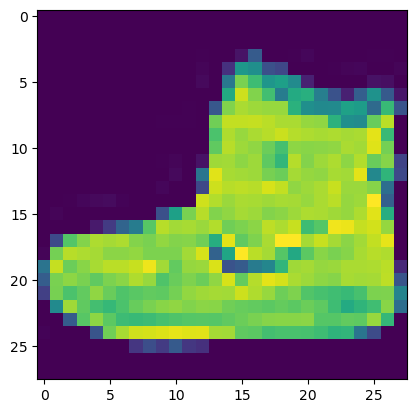

0


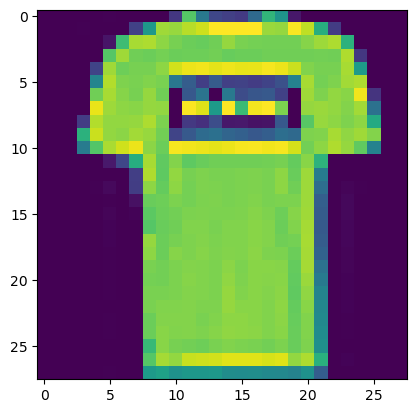

3


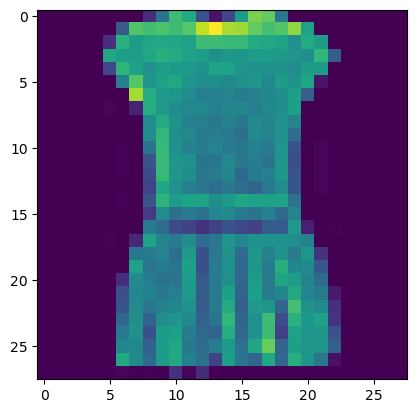

2


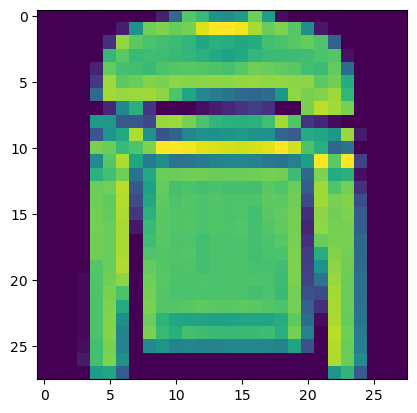

7


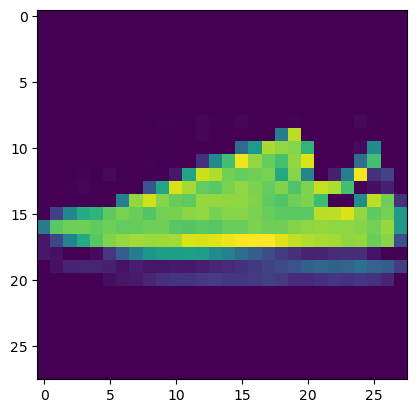

5


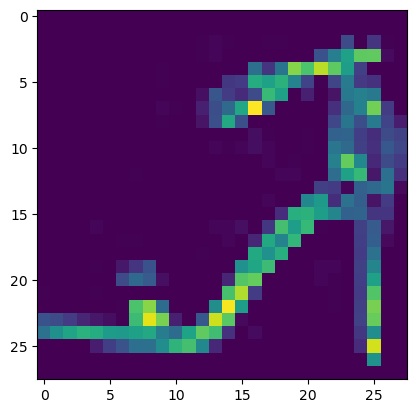

1


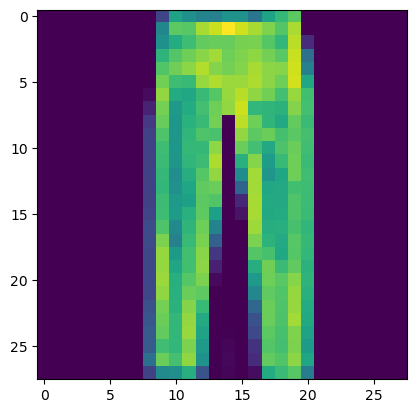

6


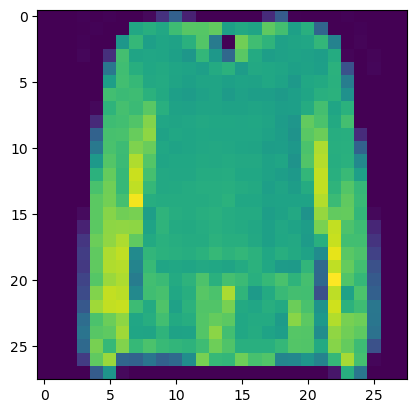

4


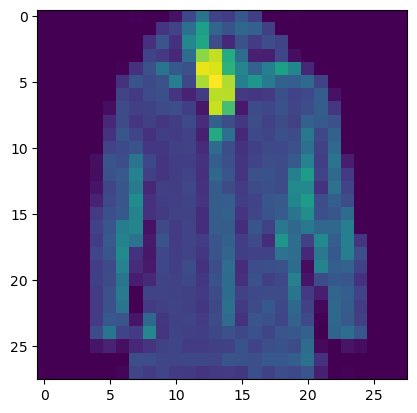

8


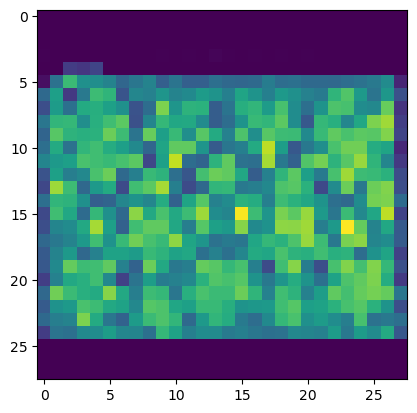

In [21]:
#To know unqiue Labels
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [22]:
test_x[5:6].shape

(1, 28, 28)

In [23]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(test_x[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(test_x[id_])
    plt.show()

1/1 [==============================] - 0s 15ms/step
trouser


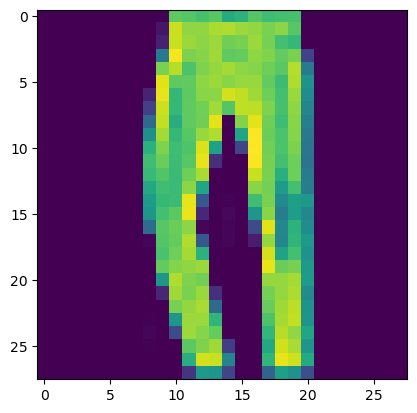

In [24]:
predict(5)